In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors 
from mpl_toolkits.mplot3d import Axes3D
import math

df = pd.read_csv("drug_resp.csv", header = None)
dft = df.T
#df.describe()

In [4]:
import seaborn as sns
import numpy as np
plt.style.use('classic')
%matplotlib inline
sns.set()

d:\env\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


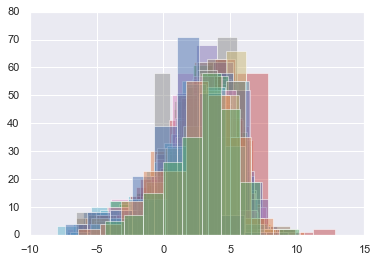

In [4]:
for col in df:
    plt.hist(df[col], normed = False, alpha = 0.5)

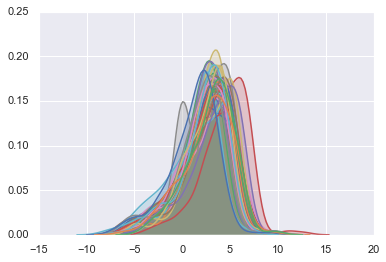

In [5]:
for col in df:
    sns.kdeplot(df[col],legend =None, shade = True)

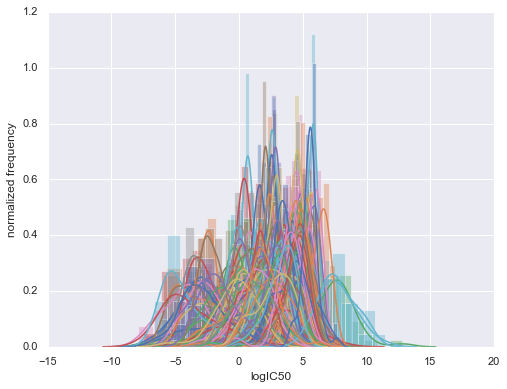

In [5]:
IC50_drugs_dist = plt.figure(figsize=(8, 6))
for col in dft:
    ax = sns.distplot(dft[col])
    ax.set(xlabel='logIC50', ylabel='normalized frequency')
IC50_drugs_dist.savefig('IC_drugs_dist.svg', format='svg', dpi=1200)

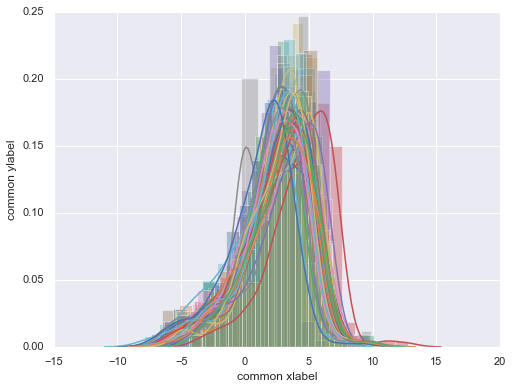

In [26]:
IC_dist = plt.figure(figsize=(8, 6))
for col in df:
    ax = sns.distplot(df[col])
    ax.set(xlabel='common xlabel', ylabel='common ylabel')
IC_dist.savefig('IC_dist.svg', format='svg', dpi=1200)
    


In [2]:
for col in range(0,1):
    sns.distplot(df[col])
    sns.distplot(dft[col])

NameError: name 'sns' is not defined

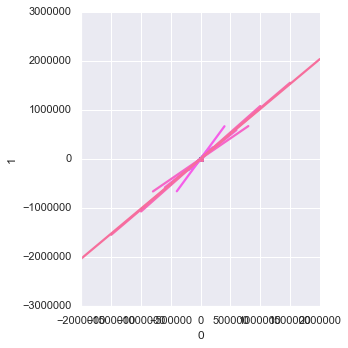

In [7]:
sns.lmplot(x="0", y="1", data=dft.rename(columns=lambda x: str(x)),
           fit_reg = True, legend = None,
           hue = "3")

           0          1
0  -6.426840   0.328123
1   4.170656  -1.023680
2   3.496549 -10.860561
3  32.173993  -3.658262
4  -4.133369   1.716888
(43, 2)


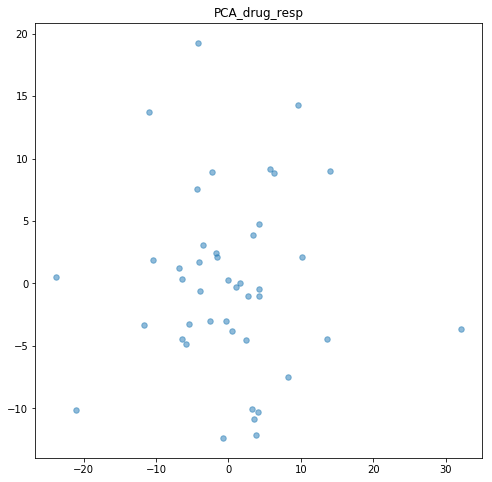

In [22]:
#********************PCA******************************
pca = PCA(2)
import numpy as np
pca.fit(dft)

pca_data = pd.DataFrame(pca.transform(dft))
print(pca_data.head())
print(pca_data.shape)
pca_data.to_csv("info.csv")

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
x = pca_data[0]
y = pca_data[1]
colors = ('r', 'b')
ax.scatter(x, y, alpha = 0.5, s = 30)
plt.title('PCA_drug_resp')
plt.show()

[0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 1]
13980.929015364323
           0          1         2
0  -6.426840   0.328123 -3.700150
1   4.170656  -1.023680 -0.240787
2   3.496549 -10.860561 -2.909377
3  32.173993  -3.658262  0.644858
4  -4.133369   1.716888  7.092817


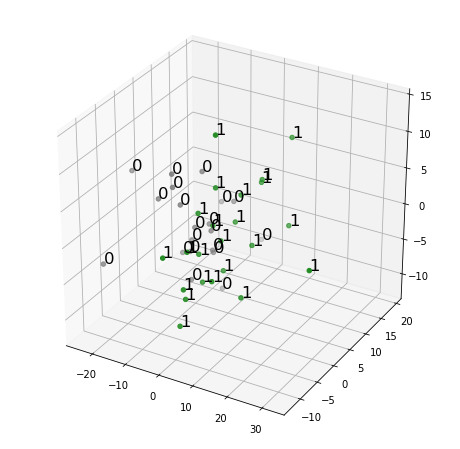

In [27]:
##******************* cluster analysis**************************
clusters = 2 #sensitive, resistant, intermediate
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(dft)
print(kmeans.labels_)
print(kmeans.inertia_)

## for 3 component
pca = PCA(3)
pca.fit(dft)

pca_data = pd.DataFrame(pca.transform(dft))
print(pca_data.head())

colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 


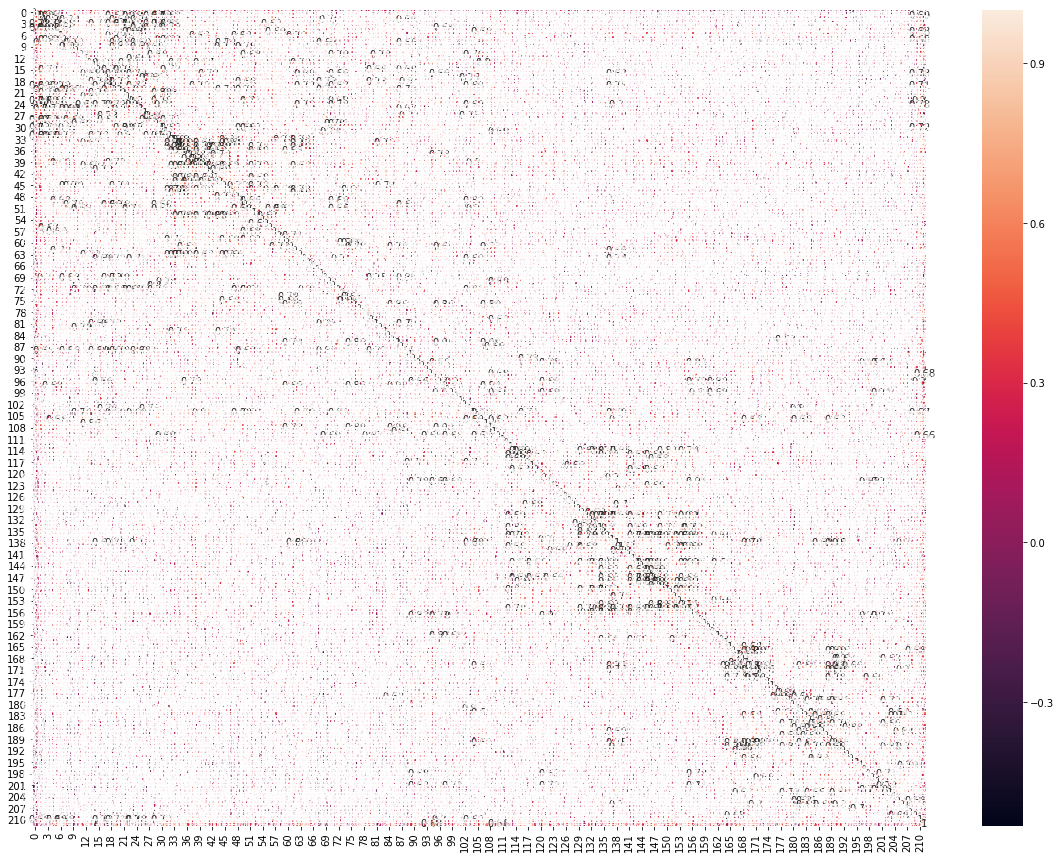

In [51]:
import seaborn as sns
# generating correlation heatmap 

  
# posting correlation heatmap to output console  
plt.figure(figsize=(20,15))
figure = sns.heatmap(dft.corr(), annot = True) 
plt.show() 

In [52]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so.to_csv("corelation_matrix_t.csv")

/home/titan6/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
